In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif , VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [59]:
data = pd.read_csv("diabetes.csv")

In [95]:
data.shape

(768, 9)

In [60]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [61]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [62]:
print(data.duplicated().sum())

0


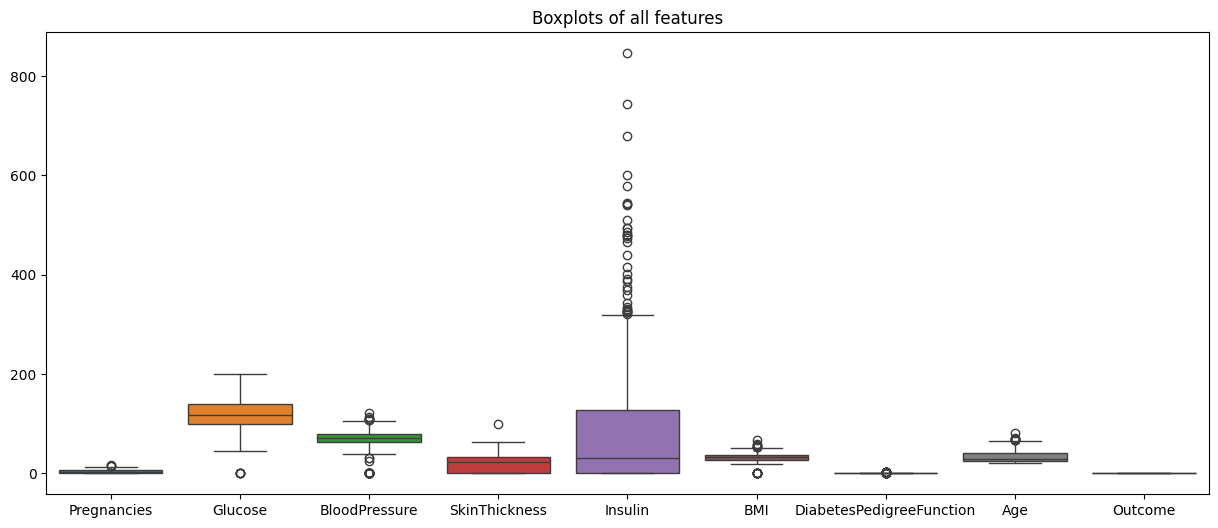

In [63]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data)
plt.title("Boxplots of all features")
plt.show()
# 4. Outlier detection
# Use boxplots to visualize outliers

In [64]:
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers}")

Outliers in Pregnancies: 88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64
Outliers in Glucose: 75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64
Outliers in BloodPressure: 7        0
15       0
18      30
43     110
49       0
60       0
78       0
81       0
84     108
106    122
125     30
172      0
177    110
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
362    108
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
549    110
589      0
597     24
601      0
604      0
619      0
643      0
691    114
697      0
703      0
706      0
Name: BloodPressure, dtype: int64
Outliers in SkinThickness: 579    99
Name: SkinThickness, dtype: int64
Outliers in Insulin: 8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    

In [65]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [66]:
corr_matrix = data.corr()
corr_matrix

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

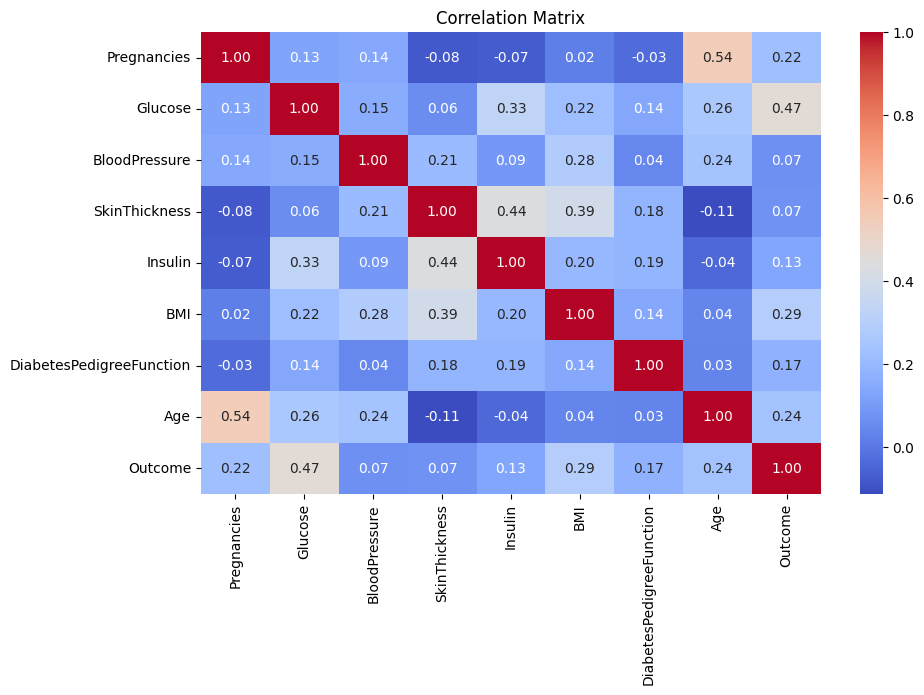

In [67]:

corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


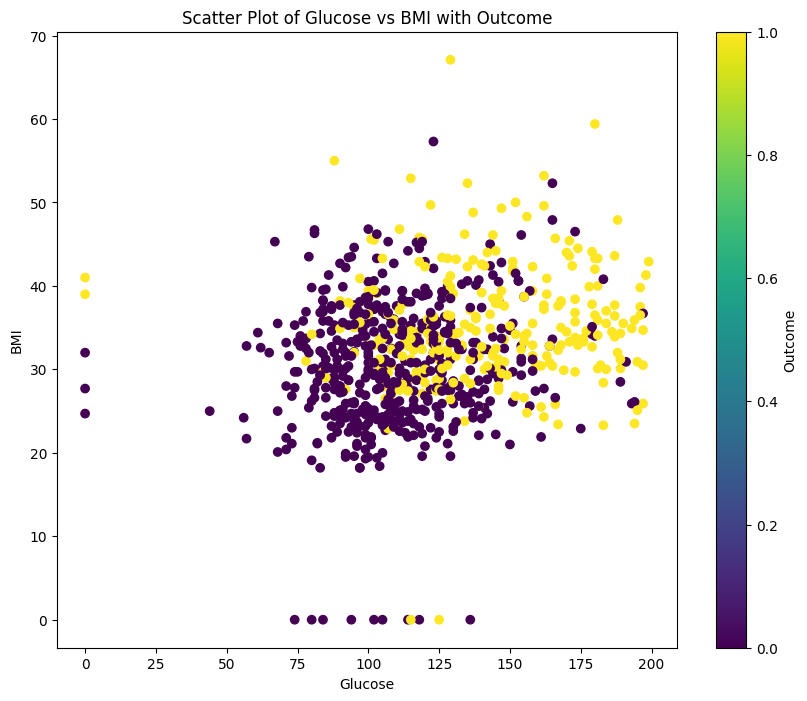

In [68]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Glucose'], data['BMI'], c=data['Outcome'], cmap='viridis')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter Plot of Glucose vs BMI with Outcome')
plt.colorbar(label='Outcome')
plt.show()

In [69]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [70]:
num = ['int64','float64']
num_vars = list(data.select_dtypes(include=num))
num_vars

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

<h2>Split</h2>

In [76]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>varianceThreshold</h2>

In [79]:
selector = VarianceThreshold(threshold=0)
selector.fit(X_train)
selector.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True])

<h2>Multicollinearity</h2>

<Axes: >

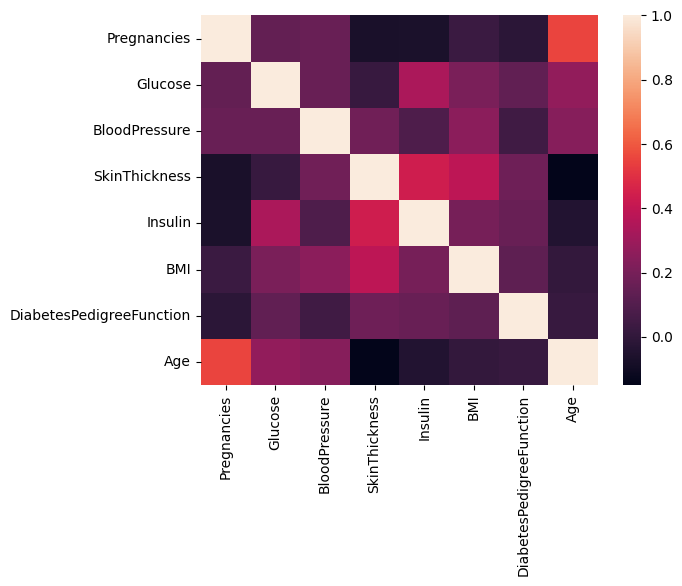

In [80]:
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix)

In [81]:
def correlation(data,threshold):
    correlated_cols = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [82]:
corr_feature = correlation(X_train,0.3)
corr_feature

{'Age', 'BMI', 'Insulin'}

<h2>Chi Square test</h2>

In [84]:
f_score = chi2(X_train, y_train)
f_score

(array([  77.45296783, 1082.92743   ,   20.37290355,   24.00729043,
        1197.14082112,  107.76612517,    3.54152397,  194.16401827]),
 array([1.35920816e-018, 1.69643293e-237, 6.37257653e-006, 9.59716188e-007,
        2.55081571e-262, 3.02441704e-025, 5.98504475e-002, 3.92162605e-044]))

In [28]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues

Pregnancies                  1.359208e-18
Glucose                     1.696433e-237
BloodPressure                6.372577e-06
SkinThickness                9.597162e-07
Insulin                     2.550816e-262
BMI                          3.024417e-25
DiabetesPedigreeFunction     5.985045e-02
Age                          3.921626e-44
dtype: float64

<h2>Univariate Analysis</h2>

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [86]:
mse_values = []
for feature in X_train.columns:
    rf = RandomForestRegressor()
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    mse_values.append(mean_squared_error(y_test,y_pred))

<Axes: >

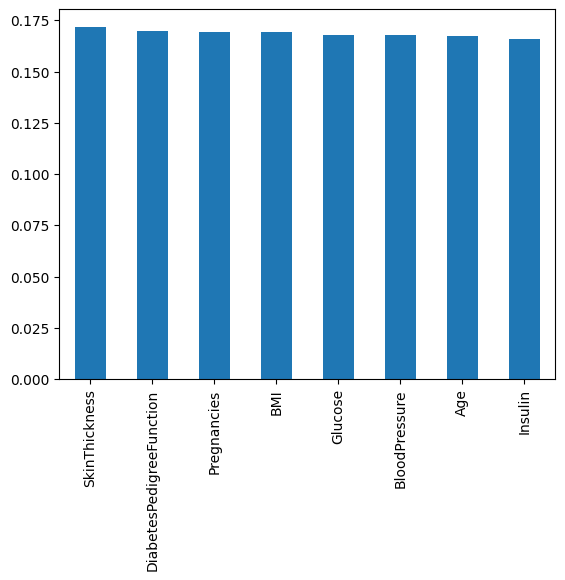

In [88]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False).plot.bar()


<h2>L1 Regularization</h2>

In [119]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [126]:
sel = SelectFromModel(LogisticRegression(penalty="l1",C=1,solver="liblinear"))
sel.fit(X_train, y_train)


SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [127]:
sel.get_feature_names_out()
len(sel.get_feature_names_out())

8

<h2>Recursive Feature Elimination (RFE)</h2>

In [130]:
from sklearn.feature_selection import RFE

In [134]:
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)
print(f"Selected features using RFE: {X.columns[rfe.support_]}")

Selected features using RFE: Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


<h2>Embedded Method - Lasso Regression</h2>

In [135]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
print(f"Selected features using Lasso: {lasso_coef[lasso_coef != 0].index}")

Selected features using Lasso: Index(['Glucose', 'BMI'], dtype='object')


<h2>Feature Importance from Tree-Based Models</h2>

In [138]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances from Random Forest:")
print(feature_importances)

Feature Importances from Random Forest:
                    Feature  Importance
1                   Glucose    0.267142
5                       BMI    0.168769
7                       Age    0.131567
6  DiabetesPedigreeFunction    0.122695
2             BloodPressure    0.088660
0               Pregnancies    0.085017
4                   Insulin    0.071547
3             SkinThickness    0.064604


In [17]:
k_best_chi2 = SelectKBest(chi2, k=5)
X_train_chi2 = k_best_chi2.fit_transform(X_train, y_train)
X_test_chi2 = k_best_chi2.transform(X_test)

In [18]:
k_best_f_classif = SelectKBest(f_classif, k=5)
X_train_f_classif = k_best_f_classif.fit_transform(X_train, y_train)
X_test_f_classif = k_best_f_classif.transform(X_test)

In [19]:
k_best_mutual_info = SelectKBest(mutual_info_classif, k=5)
X_train_mutual_info = k_best_mutual_info.fit_transform(X_train, y_train)
X_test_mutual_info = k_best_mutual_info.transform(X_test)

In [20]:
model_chi2 = RandomForestClassifier(random_state=42)
model_chi2.fit(X_train_chi2, y_train)
y_pred_chi2 = model_chi2.predict(X_test_chi2)
accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)


In [21]:
model_f_classif = RandomForestClassifier(random_state=42)
model_f_classif.fit(X_train_f_classif, y_train)
y_pred_f_classif = model_f_classif.predict(X_test_f_classif)
accuracy_f_classif = accuracy_score(y_test, y_pred_f_classif)

In [22]:
model_mutual_info = RandomForestClassifier(random_state=42)
model_mutual_info.fit(X_train_mutual_info, y_train)
y_pred_mutual_info = model_mutual_info.predict(X_test_mutual_info)
accuracy_mutual_info = accuracy_score(y_test, y_pred_mutual_info)

In [23]:
print(f"Accuracy with Chi-squared test: {accuracy_chi2}")
print(f"Accuracy with ANOVA F-test: {accuracy_f_classif}")
print(f"Accuracy with Mutual Information: {accuracy_mutual_info}")


Accuracy with Chi-squared test: 0.7402597402597403
Accuracy with ANOVA F-test: 0.7857142857142857
Accuracy with Mutual Information: 0.7402597402597403


In [24]:
print(f"\nSelected features with Chi-squared test: {X.columns[k_best_chi2.get_support()]}\n")
print(f"Selected features with ANOVA F-test: {X.columns[k_best_f_classif.get_support()]}\n")
print(f"Selected features with Mutual Information: {X.columns[k_best_mutual_info.get_support()]}")


Selected features with Chi-squared test: Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')

Selected features with ANOVA F-test: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

Selected features with Mutual Information: Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')
